<a href="https://colab.research.google.com/github/cshuler/CEE696_Deep/blob/master/my_first_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Can we use DNN to do interpolation/regression? 

The objectives of this script are

- to get familiar with NN model construction
- to show DNN is not a magic or something but just a way of buiding an interpolation/regression function. Depending on our specific implementation, its performance can change dramatically.

Here we will sample 32 noisy points from a function $ y = f(x) = \sin(2\pi x) + 5 x $ and 

and will construct 1-32-32-1 layers 

(a single input x => 32 neuron layer => 32 neuron layer => a single output y)


Basically it is like we are constructing $W_1$, $W_2$, $W_3$ matrices to learn $f(x)$

$ y = W_3W_2(W_1x) \approx f(x)$

where 

$x$ is a single value representing the input $x$ of the above function

$W_1$ is a 32 x 1 matrix

$W_2$ is a 32 x 32 matrix

$W_3$ is a 1 x 32 matrix, 

$y$ is a single value representing the output $y$ of the function.

Note that I ignored activation functions and bias variables. With activation functions, 

$$ y = W_3\sigma_2(W_2\sigma_1(W_1x))$$ 





In [0]:
import numpy as np
import tensorflow as tf

from tensorflow.keras import Sequential   # layer-by-layer model construction
from tensorflow.keras.layers import Dense # fully connected layer
from tensorflow.nn import sigmoid, relu   # activation functions

import matplotlib.pyplot as plt

In [0]:
print("numpy version:", np.__version__)
print("tensorflow version:", tf.__version__)

numpy version: 1.16.4
tensorflow version: 1.14.0


In [0]:
# Fix the random seed for reproducibility
np.random.seed(696007)
tf.set_random_seed(696007)

Here, we sample 32 points from 

$$ y = \sin(2\pi x) + 5 x $$

sine function (sin(2pi*x)) with a linear trend (5x)

In [0]:
def f(x):
    return np.sin(x*2*np.pi) + 5*x

In [0]:
# Training set and validation set
data = np.linspace(-1,1,32)
fun = f(data) + 0.25 * ( np.random.randn(32)) # add measurement error

val_data = np.linspace(-1,1,256)
val_fun = f(val_data)

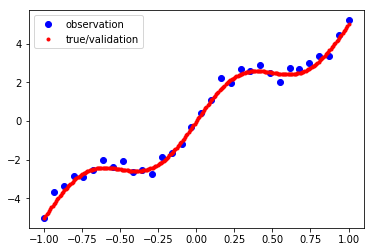

In [0]:
plt.figure()
plt.plot(data,fun,'bo',label='observation')
plt.plot(val_data,val_fun,'r.',label='true/validation')
plt.legend()


***So, using these 32 noisy observations, we will perform interpolation/regression using DNN!***


Below are helper functions for training progress and plotting results. We will see this later.

In [0]:
# Display training progress by printing a vertical bar for each completed epoch
class print_verticalbar(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 10 == 0: print('|', end='')
    def on_train_end(self, logs):
        print('- Done!!')
        
def plot_prediction(data,fun,model):
    result = model.predict(data)
    plt.plot(data, fun, 'bo', label='observation')
    plt.plot(data, result, 'k+', label='DNN')
    plt.legend()

    data_curve = np.linspace(-1,1,512)
    result_curve = model.predict(data_curve)

    plt.figure()
    plt.plot(data_curve, f(data_curve), color = 'red', label='True')
    plt.plot(data_curve, result_curve, color = 'black', label='DNN interpolation')
    plt.legend()


Let's build our model. Your task is to create DNN model with input size of 1 and output size of 1 with hidden layers. You can start adding (`model.add`) a fully connected layer (`Dense`) with 32 neurons. Input size should be 1 because we are building $y = f(x)$ with a scalar $x$ and $y$. Then you can add another layer (`Dense`) of 32 neurons. Finally, you have to have output layer with 1 neuron (1 output for $y$). For activation function, `sigmoid` was used but you can use `relu`.

In [0]:
model = tf.keras.Sequential()
model.add(Dense(32,activation=sigmoid,input_shape=(1,)))
model.add(Dense(32,activation=sigmoid))
model.add(Dense(1))
model.compile(optimizer='sgd',loss='mse', metrics=['mse']) # We will learn this "sgd" optimization option later; Our loss function is mean squred error, i.e., 1/n*sum((data-predicted)**2)


model summary and plot

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                64        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


Using TensorFlow backend.


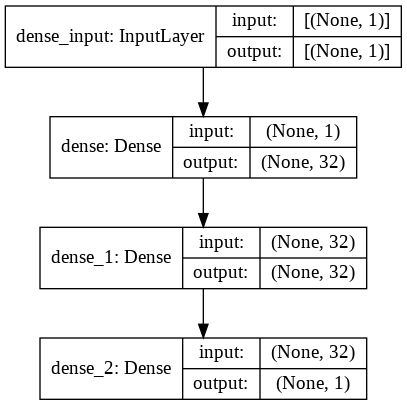

In [0]:
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [0]:
# Since we don't have sparse data, just do overfitting using 200 iterations to see what happens. We will learn all the options later
history = model.fit(data,fun, epochs=200, validation_data=(val_data,val_fun), batch_size = 16, verbose = 0, callbacks=[print_verticalbar()])

||||||||||||||||||||- Done!!


Plot our interpolated result

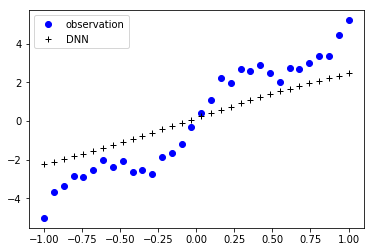

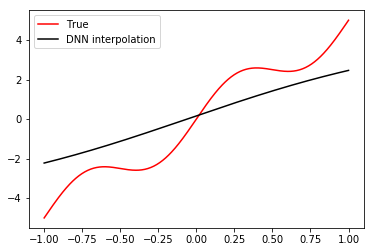

In [0]:
# interpolation 
plot_prediction(data,fun,model)

Training history visualization


dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


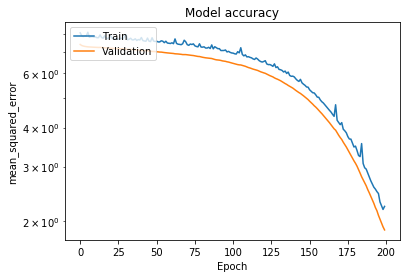

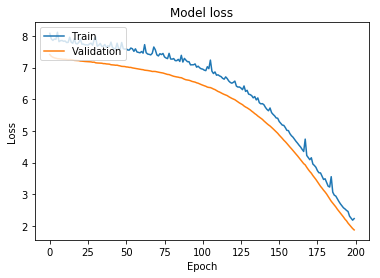

In [0]:
print(history.history.keys())


# Plot training & validation accuracy values
plt.semilogy(history.history['mean_squared_error'])
plt.semilogy(history.history['val_mean_squared_error'])
plt.title('Model accuracy')
plt.ylabel('mean_squared_error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


Q) So, our interporlation/regression result is somewhat disappointing. How can you improve it?




# Extra

You can use Pandas to tabularize training progress.







In [0]:
import pandas as pd
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
print(hist.tail(10)) # the last 10 rows

         loss  mean_squared_error  val_loss  val_mean_squared_error  epoch
190  2.699776            2.699776  2.405211                2.405211    190
191  2.636477            2.636477  2.344492                2.344492    191
192  2.574972            2.574972  2.284196                2.284196    192
193  2.538639            2.538639  2.214702                2.214702    193
194  2.492229            2.492229  2.163252                2.163252    194
195  2.457146            2.457146  2.090686                2.090686    195
196  2.308787            2.308787  2.033335                2.033335    196
197  2.245057            2.245057  1.976400                1.976400    197
198  2.183437            2.183437  1.919696                1.919695    198
199  2.233106            2.233106  1.876063                1.876063    199


### Do you want check RAM and CPU info on the remote machine?

In [0]:
# memory
!free -h
# or 
#!cat /proc/cpuinfo

              total        used        free      shared  buff/cache   available
Mem:            12G        1.1G        9.0G        3.9M        2.6G         11G
Swap:            0B          0B          0B


In [0]:
# CPU 
!cat /proc/cpuinfo


processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	:

- check CPG/GPU specifications using tensorflow


In [0]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13876959667770003563, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 16980577931795018789
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 5182243340693248762
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11330115994
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3912789378525905206
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]